In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import re


string = 'C:\\Users\\castian001\\.conda\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin'
import os     
os.environ["PATH"] += os.pathsep + string

In [96]:
le = LabelEncoder()
prog = re.compile('\d+')
re.findall(prog,'CA 2343')
def tick_clean(x):
    try:
        result = re.findall(prog,x)[-1]
    except:
        result = 0
    return result

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent
ston = ['STON/','SOTON/','SO','S.O.','SOTON','STON','CTON ','A/','W/','SC/Paris','SC/PARIS','SC/','CA ']

def ticket_cleaner2(x):
    for el in ston:
        x=x.replace(el, '')
    return x

In [97]:
df = pd.read_csv('train.csv')

In [98]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [99]:
'STON/O2. 3101282'.replace('STON','')

'/O2. 3101282'

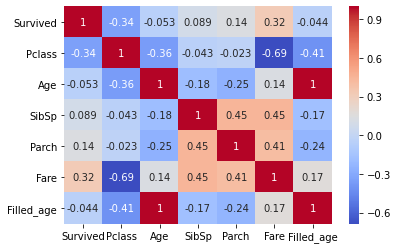

In [151]:
sns.heatmap(df.drop('PassengerId',1).corr(method='spearman'), annot=True, cmap='coolwarm');

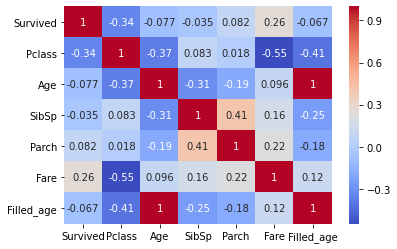

In [152]:
sns.heatmap(df.drop('PassengerId',1).corr(method='pearson'), annot=True, cmap='coolwarm');

Text(0.5, 1.0, '% of survivors by gender')

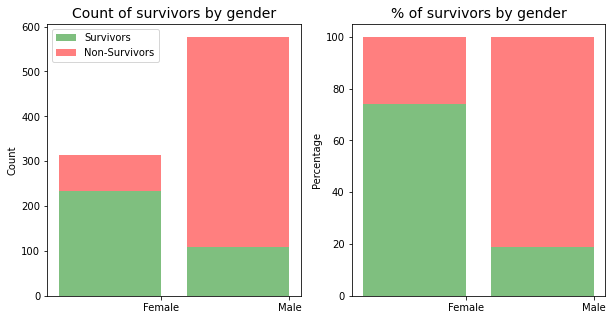

In [102]:
survivors_data = df[df.Survived==True]
non_survivors_data = df[df.Survived==False]
# calculate values for each survival status
survivors_gender = survivors_data.groupby(['Sex']).size().values
non_survivors_gender = non_survivors_data.groupby(['Sex']).size().values

# calculate totals for percentates
totals = survivors_gender + non_survivors_gender

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)

Text(0.5, 1.0, '% of survivors by class')

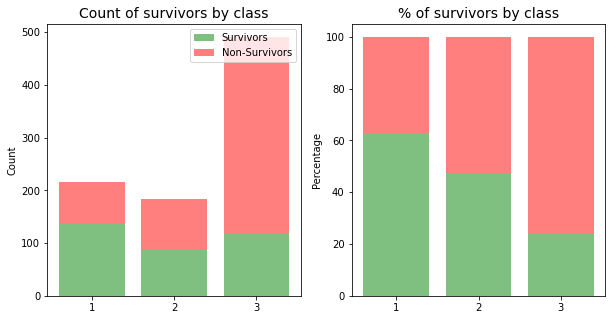

In [103]:
# calculate values for each survival status
survivors_class = survivors_data.groupby(['Pclass']).size().values
non_survivors_class = non_survivors_data.groupby(['Pclass']).size().values

# calculate totals for percentates
totals = survivors_class + non_survivors_class

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_class, totals)*100 
data2_percentages = calculate_percentage(non_survivors_class, totals)*100 


class_categories = ['1','2','3']


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_class)), survivors_class, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_class)), non_survivors_class, bottom=survivors_class, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.0, 1, 2], class_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by class",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.0, 1, 2], class_categories )
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by class",fontsize=14)

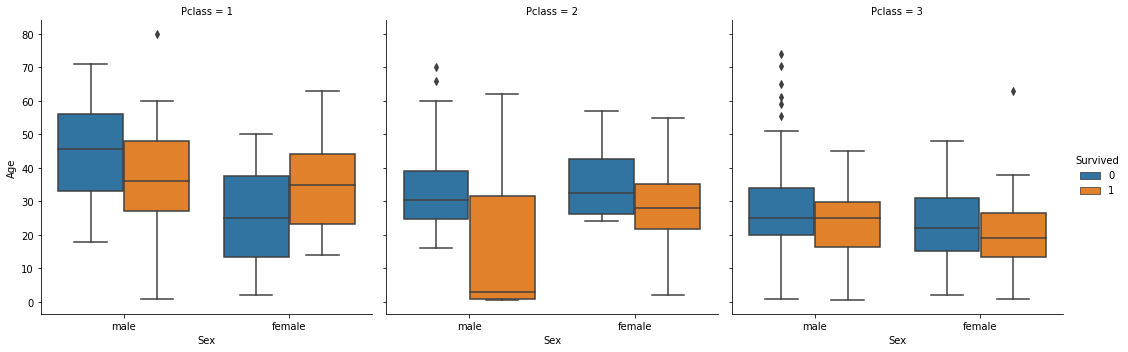

In [104]:
sns.catplot(kind='box', y='Age',x='Sex', hue='Survived',data=df, col='Pclass')

In [107]:
df['Filled_age'] = df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform(np.mean))
df['Cabin'].fillna('Missing',inplace=True)
df['Deck'] = df.Cabin.apply(lambda x: x[0])
deck_mapping= {'M':'M','C':'C','B':'B','D':'D','E':'E','A':'other','F':'other','G':'other','T':'other'}
df['Deck'] = df['Deck'].map(deck_mapping)
# df['Ticket2']= df['Ticket'].apply(lambda x: x.replace('.',''))
# df['Ticket2']=df['Ticket2'].apply(lambda x: x.replace('PC ','1'))
# df['Ticket2']=df['Ticket2'].apply(ticket_cleaner2)
# # df['Ticket2'].replace(['C.A.','A/','A./','CA','CA '],'',inplace=True)
# df['Ticket_num'] = df['Ticket'].apply(tick_clean).apply(lambda x: '0'*(
#     6-len(str(x)))+str(x)).apply(lambda x: str(x)+'0'*(7-len(str(x))))
# #df['Ticket_pre'] = df['Ticket_num'].str[:1]
# df['Ticket_pre2'] = df['Ticket_num'].str[2:4]
# df['Ticket_num'] = df['Ticket_num'].str[4:]
df['Embarked'].fillna('S',inplace=True)

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Filled_age,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,22.0,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,26.0,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,35.0,M


In [164]:
dummies = pd.get_dummies(df[['Sex','Embarked','Deck']], drop_first=True)
df2 = pd.concat([df,dummies],axis=1).drop(['Sex','Embarked','Deck'],1).drop(['PassengerId','Age','Cabin','Ticket'],1)

In [165]:
df2.head()

,Survived,Pclass,Name,SibSp,Parch,Fare,Filled_age,Sex_male,Embarked_Q,Embarked_S,Deck_C,Deck_D,Deck_E,Deck_M,Deck_other
0,0,3,"Braund, Mr. Owen Harris",1,0,7.2500,22.0,1,0,1,0,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,71.2833,38.0,0,0,0,1,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",0,0,7.9250,26.0,0,0,1,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,53.1000,35.0,0,0,1,1,0,0,0,0
4,0,3,"Allen, Mr. William Henry",0,0,8.0500,35.0,1,0,1,0,0,0,1,0


In [166]:
df2['FamilySize'] = df2['Parch']+df2['SibSp']+1
df2['IsAlone'] = 1 #initialize to yes/1 is alone
df2['IsAlone'].loc[df2['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
df2['Surname'] = df2['Name'].str.split(',').str[0]
df2['Title'] = df2['Name'].str.split(',').str[-1].str.split('.').str[0]   
df2['Surname_counts'] = df2.groupby('Surname')['Name'].transform('count')
df2['Surname_Family_counts'] = df2.groupby(['Surname','Parch','SibSp'])['Name'].transform('count')
df2['Norm_Fare'] = df2['Fare']/df2['Surname_Family_counts']

C:\Users\castian001\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [167]:
top5 = df2.Title.value_counts().nlargest(5).index
df2['Less_Title'] = df2.Title.where(df2.Title.isin(top5), other='Other')
df2['FareBin'] = pd.qcut(df2['Norm_Fare'], 4)
df2['AgeBin'] = pd.qcut(df2['Filled_age'].astype(int), 5)

label = LabelEncoder()
    
df2['Title_Code'] = label.fit_transform(df2['Title'])
df2['AgeBin_Code'] = label.fit_transform(df2['AgeBin'])
df2['FareBin_Code'] = label.fit_transform(df2['FareBin'])

df2.drop(['Name','Surname','Title','Filled_age','Fare','FareBin','AgeBin','Less_Title'],1,inplace=True)

In [168]:
df2.head()

,Survived,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Deck_C,Deck_D,Deck_E,Deck_M,Deck_other,FamilySize,IsAlone,Surname_counts,Surname_Family_counts,Norm_Fare,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,1,0,1,0,1,0,0,0,1,0,2,0,2,2,3.6250,11,1,0
1,1,1,1,0,0,0,0,1,0,0,0,0,2,0,1,1,71.2833,12,3,3
2,1,3,0,0,0,0,1,0,0,0,1,0,1,1,1,1,7.9250,8,1,1
3,1,1,1,0,0,0,1,1,0,0,0,0,2,0,2,2,26.5500,12,3,3
4,0,3,0,0,1,0,1,0,0,0,1,0,1,1,2,2,4.0250,11,3,0


In [169]:
df2.shape

(891, 20)

In [170]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               891 non-null    int64  
 1   Pclass                 891 non-null    int64  
 2   SibSp                  891 non-null    int64  
 3   Parch                  891 non-null    int64  
 4   Sex_male               891 non-null    uint8  
 5   Embarked_Q             891 non-null    uint8  
 6   Embarked_S             891 non-null    uint8  
 7   Deck_C                 891 non-null    uint8  
 8   Deck_D                 891 non-null    uint8  
 9   Deck_E                 891 non-null    uint8  
 10  Deck_M                 891 non-null    uint8  
 11  Deck_other             891 non-null    uint8  
 12  FamilySize             891 non-null    int64  
 13  IsAlone                891 non-null    int64  
 14  Surname_counts         891 non-null    int64  
 15  Surnam

Text(0.5, 1.0, '% of survivors by age group')

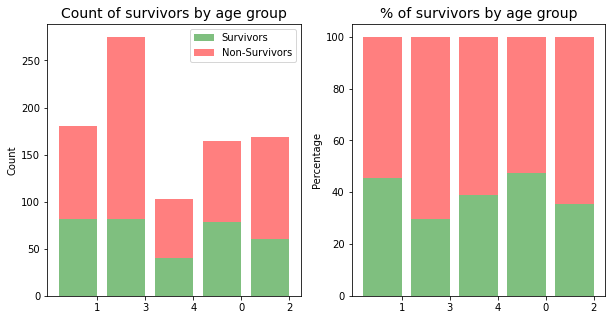

In [171]:
survivors_age = df2[df2.Survived==True]
non_survivors_age = df2[df2.Survived==False]
# calculate values for each survival status
survivors_age_group = survivors_age.groupby(['AgeBin_Code']).size().values
non_survivors_age_group = non_survivors_age.groupby(['AgeBin_Code']).size().values

# calculate totals for percentates
totals = survivors_age_group + non_survivors_age_group

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_age_group, totals)*100 
data2_percentages = calculate_percentage(non_survivors_age_group, totals)*100 


tick_spacing = np.array(range(len(df2.AgeBin_Code.unique())))+0.4


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_age_group)), survivors_age_group, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_age_group)), non_survivors_age_group, bottom=survivors_age_group, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks(tick_spacing, df2.AgeBin_Code.unique() )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by age group",fontsize=14)
plt.legend(loc='upper right')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks(tick_spacing,  df2.AgeBin_Code.unique())
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by age group",fontsize=14)

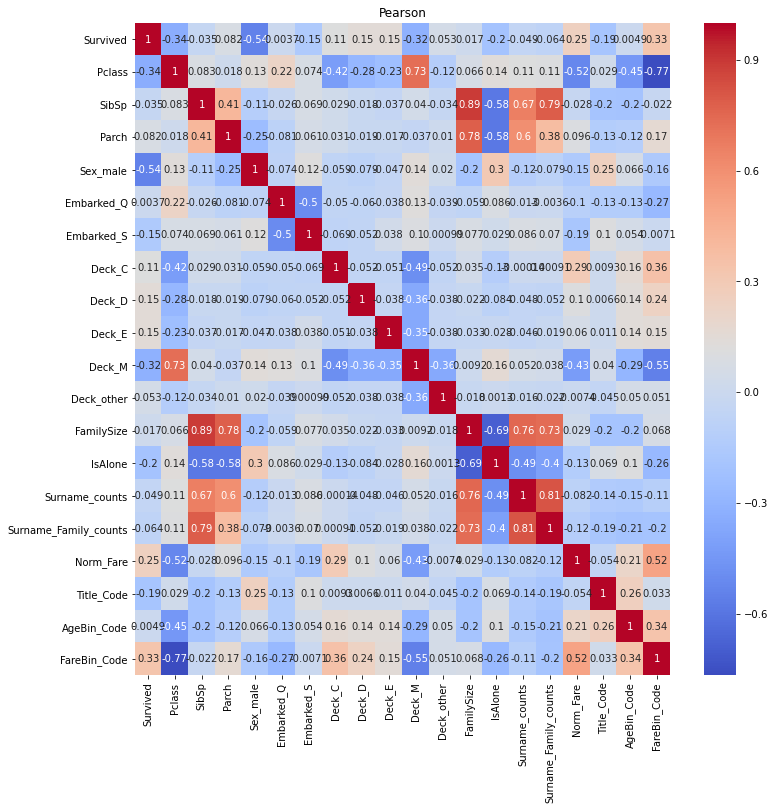

In [172]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Pearson');

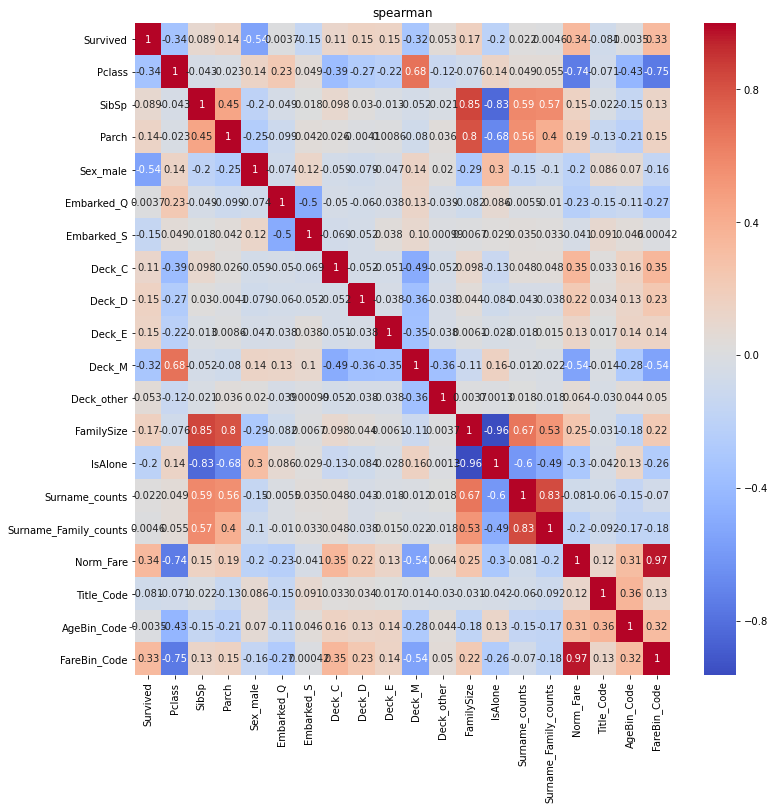

In [173]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('spearman');

In [174]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics  

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.ensemble import AdaBoostClassifier

In [175]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#svm = SVC(C=0.1)
#SGDC = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=500)
# NC = NearestCentroid()
# gnb = GaussianNB()
#dtree2 = DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf=0.05)
#nca = NeighborhoodComponentsAnalysis(random_state=42)
#rfc3 = RandomForestClassifier(random_state=42,max_depth=3,oob_score=True,class_weight='balanced')
#GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
#mlp = MLPClassifier(solver='lbfgs', alpha=1e-4,hidden_layer_sizes=(5, 2), random_state=1)

In [176]:
df2.head()

,Survived,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Deck_C,Deck_D,Deck_E,Deck_M,Deck_other,FamilySize,IsAlone,Surname_counts,Surname_Family_counts,Norm_Fare,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,1,0,1,0,1,0,0,0,1,0,2,0,2,2,3.6250,11,1,0
1,1,1,1,0,0,0,0,1,0,0,0,0,2,0,1,1,71.2833,12,3,3
2,1,3,0,0,0,0,1,0,0,0,1,0,1,1,1,1,7.9250,8,1,1
3,1,1,1,0,0,0,1,1,0,0,0,0,2,0,2,2,26.5500,12,3,3
4,0,3,0,0,1,0,1,0,0,0,1,0,1,1,2,2,4.0250,11,3,0


In [177]:
X = df2[['Pclass','Sex_male','AgeBin_Code','FamilySize']]
y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [178]:
lr = LogisticRegression()
lr.fit(X_train_std,y_train)
preds = lr.predict(X_test_std)
metrics.accuracy_score(y_test, preds)

0.8171641791044776

In [179]:
lr = LogisticRegression()
dtree = DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf=1)
rfc = RandomForestClassifier(random_state=42,max_depth=3)
bc = BaggingClassifier(base_estimator=lr, n_estimators=300, n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=5)
ada = AdaBoostClassifier(base_estimator=dtree,n_estimators=300,random_state=42)
bg = GradientBoostingClassifier(random_state=42, max_depth=2, subsample=0.8,n_estimators=300)

estimators = [('dtree', dtree),('bc', bc), ('rfc', rfc), ('ada', ada),('bg',bg),
              ('lr', lr),  ('knn',knn)]

In [180]:
results = []

for name,model in estimators:
    model.fit(X_train_std,y_train)
    preds = model.predict(X_test_std)
    rocauc = metrics.roc_auc_score(y_test, preds)
    f1 = metrics.f1_score(y_test, preds)
    prec = metrics.precision_score(y_test, preds)
    rec = metrics.recall_score(y_test, preds)
    accu = metrics.accuracy_score(y_test, preds)
     
    try:
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
        scores_mean = scores.mean()
        scores_std = scores.std()
        predict_prob = model.predict_proba(X_test)[:,1]
        roc_auc_model = roc_auc_score(y_test, predict_prob)
        
    except:
        scores_mean = np.nan
        scores_std = np.nan
        print('model ',name,' has not predict_proba')
        roc_auc_model = np.nan
        
    data=[name,accu,rocauc,roc_auc_model,f1,prec,rec,scores_mean, scores_std]    
    results.append(data)

mod_res = pd.DataFrame(results,columns=['model','accuracy','rocauc','roc_auc_prob','f1','prec',
                              'rec','scores_mean','scores_std']).sort_values(by='scores_mean',ascending=False)

In [181]:
mod_res

,model,accuracy,rocauc,roc_auc_prob,f1,prec,rec,scores_mean,scores_std
2,rfc,0.817164,0.797756,0.363201,0.756219,0.844444,0.684685,0.812567,0.007693
0,dtree,0.813433,0.795891,0.500000,0.754902,0.827957,0.693694,0.800239,0.008031
1,bc,0.817164,0.800396,0.866902,0.760976,0.829787,0.702703,0.799109,0.010759
5,lr,0.817164,0.800396,0.866385,0.760976,0.829787,0.702703,0.799109,0.010759
4,bg,0.787313,0.766999,0.378464,0.716418,0.800000,0.648649,0.794633,0.010576
6,knn,0.768657,0.749756,0.583176,0.696078,0.763441,0.639640,0.789109,0.048626
3,ada,0.787313,0.772279,0.374333,0.727273,0.775510,0.684685,0.787917,0.017003


(0.0, 1.0)

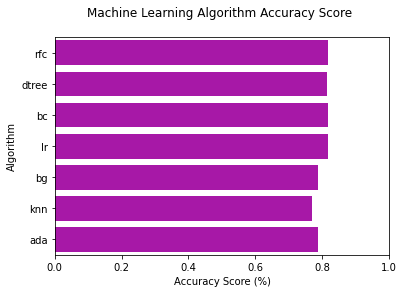

In [182]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='accuracy', y = 'model', data = mod_res, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0,1)

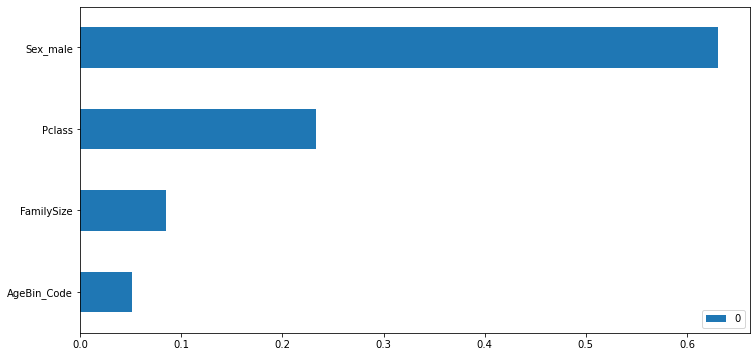

In [183]:
pd.DataFrame(rfc.feature_importances_,index=X_test.columns).sort_values(
    by=0,ascending=True).plot(kind='barh', figsize=(12,6))

In [184]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

SKF = StratifiedKFold(5,shuffle=True, random_state=42)

# all variables

In [190]:
target = 'Survived'
X = df2.drop('Survived',1)
y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [191]:
X.head()

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Deck_C,Deck_D,Deck_E,Deck_M,Deck_other,FamilySize,IsAlone,Surname_counts,Surname_Family_counts,Norm_Fare,Title_Code,AgeBin_Code,FareBin_Code
0,3,1,0,1,0,1,0,0,0,1,0,2,0,2,2,3.6250,11,1,0
1,1,1,0,0,0,0,1,0,0,0,0,2,0,1,1,71.2833,12,3,3
2,3,0,0,0,0,1,0,0,0,1,0,1,1,1,1,7.9250,8,1,1
3,1,1,0,0,0,1,1,0,0,0,0,2,0,2,2,26.5500,12,3,3
4,3,0,0,1,0,1,0,0,0,1,0,1,1,2,2,4.0250,11,3,0


In [192]:
lr = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf=1)
rfc = RandomForestClassifier(random_state=42,max_depth=3)
bc = BaggingClassifier(base_estimator=lr, n_estimators=300, n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=5)
ada = AdaBoostClassifier(base_estimator=dtree,n_estimators=300,random_state=42)
bg = GradientBoostingClassifier(random_state=42, max_depth=2, subsample=0.8,n_estimators=300)

estimators = [('dtree', dtree),('bc', bc), ('rfc', rfc), ('ada', ada),('bg',bg),
              ('lr', lr),  ('knn',knn)]
results = []

for name,model in estimators:
    model.fit(X_train_std,y_train)
    preds = model.predict(X_test_std)
    rocauc = metrics.roc_auc_score(y_test, preds)
    f1 = metrics.f1_score(y_test, preds)
    prec = metrics.precision_score(y_test, preds)
    rec = metrics.recall_score(y_test, preds)
    accu = metrics.accuracy_score(y_test, preds)
     
    try:
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
        scores_mean = scores.mean()
        scores_std = scores.std()
        predict_prob = model.predict_proba(X_test)[:,1]
        roc_auc_model = roc_auc_score(y_test, predict_prob)
        
    except:
        scores_mean = np.nan
        scores_std = np.nan
        print('model ',name,' has not predict_proba')
        roc_auc_model = np.nan
        
    data=[name,accu,rocauc,roc_auc_model,f1,prec,rec,scores_mean, scores_std]    
    results.append(data)

mod_res = pd.DataFrame(results,columns=['model','accuracy','rocauc','roc_auc_prob','f1','prec',
                              'rec','scores_mean','scores_std']).sort_values(by='accuracy',ascending=False)

In [193]:
mod_res

,model,accuracy,rocauc,roc_auc_prob,f1,prec,rec,scores_mean,scores_std
0,dtree,0.820896,0.811499,0.645263,0.777778,0.800000,0.756757,0.799115,0.018446
2,rfc,0.813433,0.793252,0.616715,0.750000,0.842697,0.675676,0.787917,0.019429
4,bg,0.813433,0.802490,0.516756,0.766355,0.796117,0.738739,0.823796,0.018970
1,bc,0.802239,0.792936,0.820623,0.755760,0.773585,0.738739,0.793528,0.018440
5,lr,0.802239,0.792936,0.831067,0.755760,0.773585,0.738739,0.793528,0.018440
3,ada,0.753731,0.748895,0.396052,0.707965,0.695652,0.720721,0.785663,0.019223
6,knn,0.746269,0.730648,0.594795,0.676190,0.717172,0.639640,0.732942,0.027210


(0.7, 1.0)

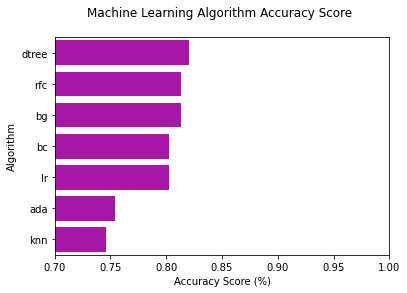

In [194]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='accuracy', y = 'model', data = mod_res, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.7,1)

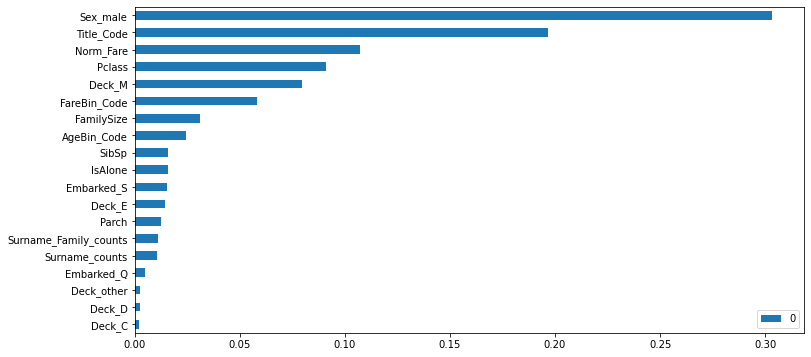

In [195]:
pd.DataFrame(rfc.feature_importances_,index=X_test.columns).sort_values(
    by=0,ascending=True).plot(kind='barh', figsize=(12,6))

In [196]:
cv = 6
scoring='accuracy'

print('knn')
param_grid = {'n_neighbors':np.arange(2,30,2),
             'p':[1,2,3]}

gs = GridSearchCV(knn,param_grid,scoring=scoring,n_jobs=-1, cv=cv, verbose=1,)

gs.fit(X_train,y_train)

print('best score:', gs.best_score_, ' best params', gs.best_params_,' best test score', gs.score(X_test,y_test))

print('LR')
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet'],
             'C':[1,2,2.2,2.5],
             'class_weight':[None,'balanced']}

gs = GridSearchCV(lr,param_grid,scoring=scoring,n_jobs=-1, cv=cv, verbose=1)
gs.fit(X_train,y_train)

print('best score:', gs.best_score_, ' best params', gs.best_params_,' best test score', gs.score(X_test,y_test))


print('DTREE')
param_grid = {'max_depth':[3,4,5,6,7],
             'class_weight':[None,'balanced'],
             'criterion':['gini'],
             'min_samples_split':[1,2,5,10],
             'min_samples_leaf':[0.005,0.01] ,
             'ccp_alpha':[0,0.005,0.007]}

gs = GridSearchCV(dtree,param_grid,scoring=scoring,n_jobs=-1, cv=cv, verbose=1)
gs.fit(X_train,y_train)

print('best score:', gs.best_score_, ' best params', gs.best_params_,' best test score', gs.score(X_test,y_test))


print('RFC')
param_grid = {'max_depth':[5,6,7],
             'class_weight':[None],
             'criterion':['entropy'],
             'min_samples_split':[1,2,4],
             'min_samples_leaf':[0.01,0.1] ,
             'ccp_alpha':[0,0.005],
             'n_estimators':[450,500,550]}

gs = GridSearchCV(rfc,param_grid,scoring=scoring,n_jobs=-1, cv=cv, verbose=1)
gs.fit(X_train,y_train)

print('best score:', gs.best_score_, ' best params', gs.best_params_,' best test score', gs.score(X_test,y_test))
print('BG')

param_grid = {'max_depth':[3,5,6,7],
             'n_estimators':[75,150,350],
             'subsample':[0.5,0.65,0.8]}

gs = GridSearchCV(bg,param_grid,scoring=scoring,n_jobs=-1, cv=cv, verbose=1)
gs.fit(X_train,y_train)

print('best score:', gs.best_score_, ' best params', gs.best_params_,' best test score', gs.score(X_test,y_test))

knn
Fitting 6 folds for each of 42 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


best score: 0.7577327607667413  best params {'n_neighbors': 12, 'p': 1}  best test score 0.746268656716418
LR
Fitting 6 folds for each of 24 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 129 out of 144 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    2.8s finished


best score: 0.7946850883744087  best params {'C': 2, 'class_weight': None, 'penalty': 'l2'}  best test score 0.8059701492537313
DTREE
Fitting 6 folds for each of 240 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


best score: 0.8267052526761264  best params {'ccp_alpha': 0.007, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 0.005, 'min_samples_split': 10}  best test score 0.8171641791044776
RFC
Fitting 6 folds for each of 108 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  2.1min finished


best score: 0.8267208115509086  best params {'ccp_alpha': 0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 0.01, 'min_samples_split': 2, 'n_estimators': 450}  best test score 0.7947761194029851
BG
Fitting 6 folds for each of 36 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   37.0s finished


best score: 0.8379854368932039  best params {'max_depth': 3, 'n_estimators': 350, 'subsample': 0.8}  best test score 0.7985074626865671


(0.7, 1.0)

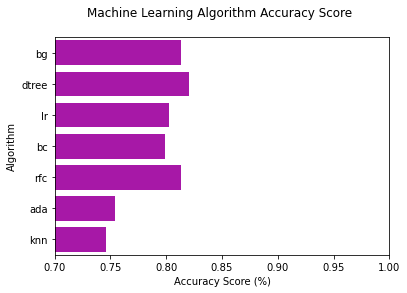

In [199]:
# knn = KNeighborsClassifier(n_neighbors=12,p=1)
# lr = LogisticRegression(C=1, class_weight='balanced', penalty='l2',max_iter=1000)
# dtree = DecisionTreeClassifier(random_state=42,ccp_alpha=0, 
#                                criterion='gini', max_depth=4, min_samples_leaf=0.005, min_samples_split=10)
# rfc = RandomForestClassifier(random_state=42,ccp_alpha=0.005, criterion='entropy', 
#                             max_depth=5, min_samples_leaf=0.01, min_samples_split=2, n_estimators=450)

# bg = GradientBoostingClassifier(random_state=42, max_depth=3, subsample=0.65,n_estimators=75)

# estimators = [('dtree', dtree),('rfc', rfc), ('bg',bg),
#               ('lr', lr),  ('knn',knn)]
results = []

for name,model in estimators:
    model.fit(X_train_std,y_train)
    preds = model.predict(X_test_std)
    rocauc = metrics.roc_auc_score(y_test, preds)
    f1 = metrics.f1_score(y_test, preds)
    prec = metrics.precision_score(y_test, preds)
    rec = metrics.recall_score(y_test, preds)
    accu = metrics.accuracy_score(y_test, preds)
     
    try:
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=6)
        scores_mean = scores.mean()
        scores_std = scores.std()
        predict_prob = model.predict_proba(X_test)[:,1]
        roc_auc_model = roc_auc_score(y_test, predict_prob)
        
    except:
        scores_mean = np.nan
        scores_std = np.nan
        print('model ',name,' has not predict_proba')
        roc_auc_model = np.nan
        
    data=[name,accu,rocauc,roc_auc_model,f1,prec,rec,scores_mean, scores_std]    
    results.append(data)

mod_res = pd.DataFrame(results,columns=['model','accuracy','rocauc','roc_auc_prob','f1','prec',
                              'rec','scores_mean','scores_std']).sort_values(by='scores_mean',ascending=False)
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='accuracy', y = 'model', data = mod_res, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.7,1)

In [200]:
mod_res

,model,accuracy,rocauc,roc_auc_prob,f1,prec,rec,scores_mean,scores_std
4,bg,0.813433,0.802490,0.516756,0.766355,0.796117,0.738739,0.827196,0.028223
0,dtree,0.820896,0.811499,0.645263,0.777778,0.800000,0.756757,0.804734,0.015727
5,lr,0.802239,0.792936,0.831067,0.755760,0.773585,0.738739,0.797993,0.025019
1,bc,0.798507,0.789752,0.821713,0.752294,0.766355,0.738739,0.795771,0.027087
2,rfc,0.813433,0.793252,0.616715,0.750000,0.842697,0.675676,0.795687,0.030288
3,ada,0.753731,0.748895,0.396052,0.707965,0.695652,0.720721,0.791304,0.019190
6,knn,0.746269,0.730648,0.594795,0.676190,0.717172,0.639640,0.746365,0.026674


# Ensemble

model  Hard  has not predict_proba


(0.0, 1.0)

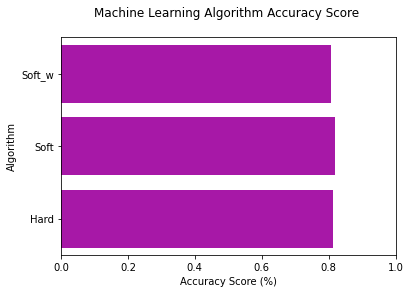

In [206]:
v_ests = [('rfc', rfc), ('bg', bg), ('lr', lr), ('dtree',dtree)]
eclf = VotingClassifier(estimators=v_ests, voting='hard')
v_ests = [('rfc', rfc), ('bg', bg), ('lr', lr), ('dtree',dtree)]
eclfsoft = VotingClassifier(estimators=v_ests, voting='soft')
v_ests_w = [('rfc', rfc), ('bg', bg), ('dtree',dtree)]
eclfsoft_w = VotingClassifier(estimators=v_ests_w, voting='soft', weights=[1,2,1])

estimators = [('Hard',eclf),   ('Soft',eclfsoft),   ('Soft_w',eclfsoft_w)]

results = []
for name,model in estimators:
    model.fit(X_train_std,y_train)
    preds = model.predict(X_test_std)
    rocauc = metrics.roc_auc_score(y_test, preds)
    f1 = metrics.f1_score(y_test, preds)
    prec = metrics.precision_score(y_test, preds)
    rec = metrics.recall_score(y_test, preds)
    accu = metrics.accuracy_score(y_test, preds)
     
    try:
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=6)
        scores_mean = scores.mean()
        scores_std = scores.std()
        predict_prob = model.predict_proba(X_test)[:,1]
        roc_auc_model = roc_auc_score(y_test, predict_prob)
        
    except:
        scores_mean = np.nan
        scores_std = np.nan
        print('model ',name,' has not predict_proba')
        roc_auc_model = np.nan
        
    data=[name,accu,rocauc,roc_auc_model,f1,prec,rec,scores_mean, scores_std]    
    results.append(data)

mod_res = pd.DataFrame(results,columns=['model','accuracy','rocauc','roc_auc_prob','f1','prec',
                              'rec','scores_mean','scores_std']).sort_values(by='scores_mean',ascending=False)
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='accuracy', y = 'model', data = mod_res, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0,1)

In [207]:
mod_res

,model,accuracy,rocauc,roc_auc_prob,f1,prec,rec,scores_mean,scores_std
2,Soft_w,0.805970,0.793481,0.598927,0.754717,0.792079,0.720721,0.832819,0.030159
1,Soft,0.817164,0.806995,0.779882,0.772093,0.798077,0.747748,0.820440,0.026381
0,Hard,0.813433,0.795891,NaN,0.754902,0.827957,0.693694,NaN,NaN


## NN

In [208]:
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers

In [210]:
df2.head()

,Survived,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Deck_C,Deck_D,Deck_E,Deck_M,Deck_other,FamilySize,IsAlone,Surname_counts,Surname_Family_counts,Norm_Fare,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,1,0,1,0,1,0,0,0,1,0,2,0,2,2,3.6250,11,1,0
1,1,1,1,0,0,0,0,1,0,0,0,0,2,0,1,1,71.2833,12,3,3
2,1,3,0,0,0,0,1,0,0,0,1,0,1,1,1,1,7.9250,8,1,1
3,1,1,1,0,0,0,1,1,0,0,0,0,2,0,2,2,26.5500,12,3,3
4,0,3,0,0,1,0,1,0,0,0,1,0,1,1,2,2,4.0250,11,3,0


In [214]:
train, test = train_test_split(df2, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

569 train examples
143 validation examples
179 test examples


In [215]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Survived')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [216]:
batch_size = 32 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [219]:
df2.drop('Survived',1).columns

Index(['Pclass', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_M', 'Deck_other', 'FamilySize',
       'IsAlone', 'Surname_counts', 'Surname_Family_counts', 'Norm_Fare',
       'Title_Code', 'AgeBin_Code', 'FareBin_Code'],
      dtype='object')

In [220]:
feature_columns = []

# numeric cols
for header in df2.drop('Survived',1).columns:
    feature_columns.append(feature_column.numeric_column(header))

In [221]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [230]:
model = tf.keras.Sequential([
      feature_layer,
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=200)

Epoch 1/200
18/18 [==============================] - 2s 123ms/step - loss: 0.7084 - accuracy: 0.6432 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/200
18/18 [==============================] - 0s 14ms/step - loss: 0.5945 - accuracy: 0.6591 - val_loss: 0.5789 - val_accuracy: 0.7413
Epoch 3/200
18/18 [==============================] - 0s 13ms/step - loss: 0.5607 - accuracy: 0.6784 - val_loss: 0.6065 - val_accuracy: 0.7203
Epoch 4/200
18/18 [==============================] - 0s 12ms/step - loss: 0.5890 - accuracy: 0.6819 - val_loss: 0.6197 - val_accuracy: 0.7133
Epoch 5/200
18/18 [==============================] - 0s 13ms/step - loss: 0.5860 - accuracy: 0.6907 - val_loss: 0.5411 - val_accuracy: 0.7343
Epoch 6/200
18/18 [==============================] - 0s 13ms/step - loss: 0.5719 - accuracy: 0.6766 - val_loss: 0.5418 - val_accuracy: 0.7413
Epoch 7/200
18/18 [==============================] - 0s 14ms/step - loss: 0.5371 - accuracy: 0.6661 - val_loss: 0.5471 - val_accuracy: 0.73

18/18 [==============================] - 0s 16ms/step - loss: 0.3962 - accuracy: 0.8471 - val_loss: 0.6518 - val_accuracy: 0.7832
Epoch 59/200
18/18 [==============================] - 0s 12ms/step - loss: 0.3745 - accuracy: 0.8383 - val_loss: 0.6547 - val_accuracy: 0.8392
Epoch 60/200
18/18 [==============================] - 0s 13ms/step - loss: 0.3243 - accuracy: 0.8699 - val_loss: 0.6548 - val_accuracy: 0.8322
Epoch 61/200
18/18 [==============================] - 0s 13ms/step - loss: 0.3221 - accuracy: 0.8506 - val_loss: 0.6587 - val_accuracy: 0.8112
Epoch 62/200
18/18 [==============================] - 0s 12ms/step - loss: 0.3251 - accuracy: 0.8576 - val_loss: 0.6858 - val_accuracy: 0.8182
Epoch 63/200
18/18 [==============================] - 0s 13ms/step - loss: 0.3201 - accuracy: 0.8471 - val_loss: 0.6742 - val_accuracy: 0.8392
Epoch 64/200
18/18 [==============================] - 0s 12ms/step - loss: 0.3332 - accuracy: 0.8471 - val_loss: 0.7088 - val_accuracy: 0.8252
Epoch 65/200

18/18 [==============================] - 0s 12ms/step - loss: 0.2457 - accuracy: 0.8928 - val_loss: 1.1495 - val_accuracy: 0.8322
Epoch 116/200
18/18 [==============================] - 0s 12ms/step - loss: 0.2474 - accuracy: 0.8963 - val_loss: 1.1492 - val_accuracy: 0.8462
Epoch 117/200
18/18 [==============================] - 0s 13ms/step - loss: 0.2434 - accuracy: 0.8910 - val_loss: 1.0918 - val_accuracy: 0.8531
Epoch 118/200
18/18 [==============================] - 0s 12ms/step - loss: 0.2395 - accuracy: 0.8928 - val_loss: 1.1466 - val_accuracy: 0.8392
Epoch 119/200
18/18 [==============================] - 0s 13ms/step - loss: 0.2418 - accuracy: 0.8858 - val_loss: 1.1313 - val_accuracy: 0.8112
Epoch 120/200
18/18 [==============================] - 0s 13ms/step - loss: 0.2367 - accuracy: 0.8963 - val_loss: 1.1429 - val_accuracy: 0.8322
Epoch 121/200
18/18 [==============================] - 0s 12ms/step - loss: 0.2281 - accuracy: 0.8963 - val_loss: 1.1746 - val_accuracy: 0.8322
Epoch 

Epoch 172/200
18/18 [==============================] - 0s 15ms/step - loss: 0.2342 - accuracy: 0.9051 - val_loss: 1.4895 - val_accuracy: 0.7902
Epoch 173/200
18/18 [==============================] - 0s 13ms/step - loss: 0.2326 - accuracy: 0.9121 - val_loss: 1.6823 - val_accuracy: 0.8112
Epoch 174/200
18/18 [==============================] - 0s 14ms/step - loss: 0.2069 - accuracy: 0.9033 - val_loss: 1.7678 - val_accuracy: 0.8252
Epoch 175/200
18/18 [==============================] - 0s 15ms/step - loss: 0.1871 - accuracy: 0.9209 - val_loss: 1.6536 - val_accuracy: 0.8252
Epoch 176/200
18/18 [==============================] - 0s 16ms/step - loss: 0.2824 - accuracy: 0.8928 - val_loss: 1.7017 - val_accuracy: 0.7832
Epoch 177/200
18/18 [==============================] - 0s 18ms/step - loss: 0.2367 - accuracy: 0.8928 - val_loss: 1.7102 - val_accuracy: 0.7902
Epoch 178/200
18/18 [==============================] - 0s 13ms/step - loss: 0.2080 - accuracy: 0.9033 - val_loss: 1.7792 - val_accuracy:

In [231]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

6/6 [==============================] - 1s 84ms/step - loss: 0.9260 - accuracy: 0.7374
Accuracy 0.73743016
